# Netflix Movies and TV Shows (Case Study)

**TV Shows and Movies listed on Netflix**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting [report](https://flixable.com/netflix-museum/) which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.


#1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2. Data Understanding

In [ ]:
netflix = pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
# 5 data pertama
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# 5 data terakhir
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# Statistik
netflix.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s6747,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,"Look Out, Officer",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787,NaN,NaN,NaN,2013.93,8.75739,1925,2013,2017,2018,2021
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listed_in,7787,492,Documentaries,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,7787,7769,A surly septuagenarian gets another chance at ...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Informasi data
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Analisa Null Values, akan membuat table boolean
netflix.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,True,False,True,False,False,False,False,False,False
7785,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Melihat jumlah table null
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Melihat nilai-nilai unique, lebih sering mayoritas type data String / categorical value
# Kemungkinan duplikat data
netflix.nunique()

show_id         7787
type               2
title           7787
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

# 3. Data Preprocessing

# Simple Preprocessing


## Menghapus Column keseluruhan Director dan Cast

In [ ]:
# axis = 1 , director and cast is column / kolom
# axis = 0 , jika ingin menghapus baris atau row
netflix.drop(['director', 'cast'], axis = 1,inplace=True)

In [ ]:
netflix.isnull().sum()

show_id           0
type              0
title             0
country         507
date_added       10
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

## Country
Modus

In [ ]:
netflix['country'].mode()

0    United States
dtype: object

In [ ]:
netflix['country'].mode()[0]

'United States'

In [ ]:
# fillna = mengisi column yang missing values dengan column modus nya
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

In [ ]:
netflix.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

## Rating

In [ ]:
rating_null = netflix['rating'].isnull()
rating_null

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Name: rating, Length: 7787, dtype: bool

In [ ]:
rating_null_dataframe = netflix[rating_null]
rating_null_dataframe

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
rating_replacements = {
     67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA'
}

In [ ]:
rating_replacements.items()

dict_items([(67, 'TV-PG'), (2359, 'TV-14'), (3660, 'TV-MA'), (3736, 'TV-MA'), (3737, 'NR'), (3738, 'TV-MA'), (4323, 'TV-MA')])

In [ ]:
for id, rate in rating_replacements.items():
  netflix.loc[id,'rating'] = rate

In [ ]:
netflix.isnull().sum()

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

## Date Added

In [ ]:
# replace berlaku untuk dataframe, sehingga kurung siku 2 untuk mengubah menjadi dataframe
netflix['date_added'] = netflix[['date_added']].replace(np.nan, 'Not Added') 

In [ ]:
netflix.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 4. Data Visualization
**bold text**

In [ ]:
# 15 data yang paling banyak atau tertinggi tahun
netflix['release_year'].value_counts().index[0:15]

Int64Index([2018, 2017, 2019, 2016, 2020, 2015, 2014, 2013, 2012, 2010, 2011,
            2009, 2008, 2006, 2007],
           dtype='int64')

Text(0, 0.5, 'Year')

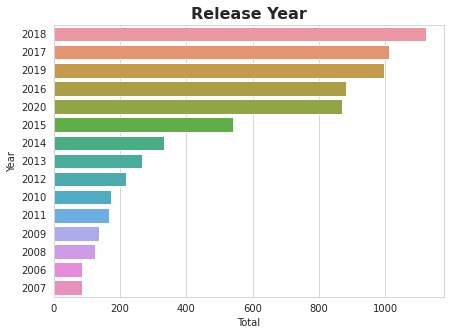

In [ ]:
plt.figure(figsize=(7,5))
sns.set_style('whitegrid')
sns.countplot(y='release_year', data=netflix, order=netflix['release_year'].value_counts().index[0:15])
plt.title('Release Year', fontsize=16, fontweight='bold')
plt.xlabel('Total')
plt.ylabel('Year')

Text(0, 0.5, 'Total')

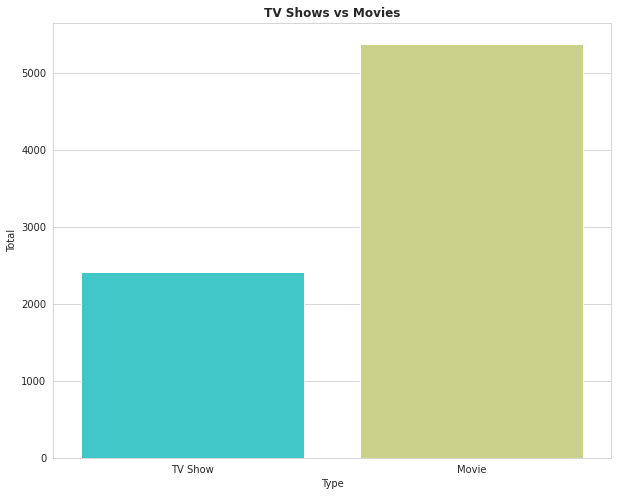

In [ ]:
# Distribusi TV shows dan Movies
plt.figure(figsize=(10,8))
sns.countplot(x='type', data=netflix, palette='rainbow')
plt.title('TV Shows vs Movies', fontsize =12, fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Total')

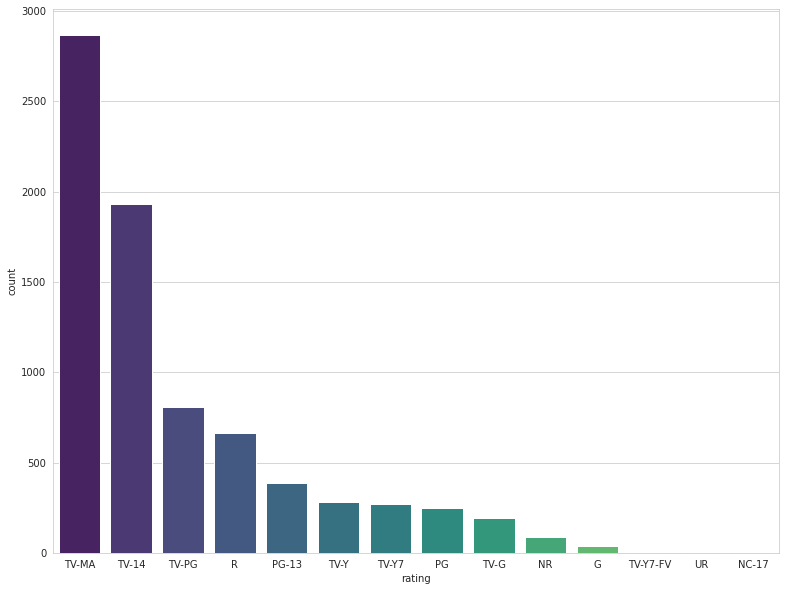

In [ ]:
# Distribusi rating urut
plt.figure(figsize=(13,10))
sns.countplot(x='rating', data=netflix, palette='viridis', order=netflix['rating'].value_counts().index[0:14])

In [ ]:
# melihat di netflix, bulan-bulan yang film rilis paling terbanyak
# pada data tidak ada kolum bulan, hanya ada kolum tahun dan tanggal, namun di kolum tanggal terdapat bulan dan masih berformat tanggal
# format tanggal = bulan tanggal,tahun
# lambda = operasi yang sama untuk setiap yang ada di date added
netflix['month_release'] = netflix['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,month_release
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January


Text(0, 0.5, 'Total')

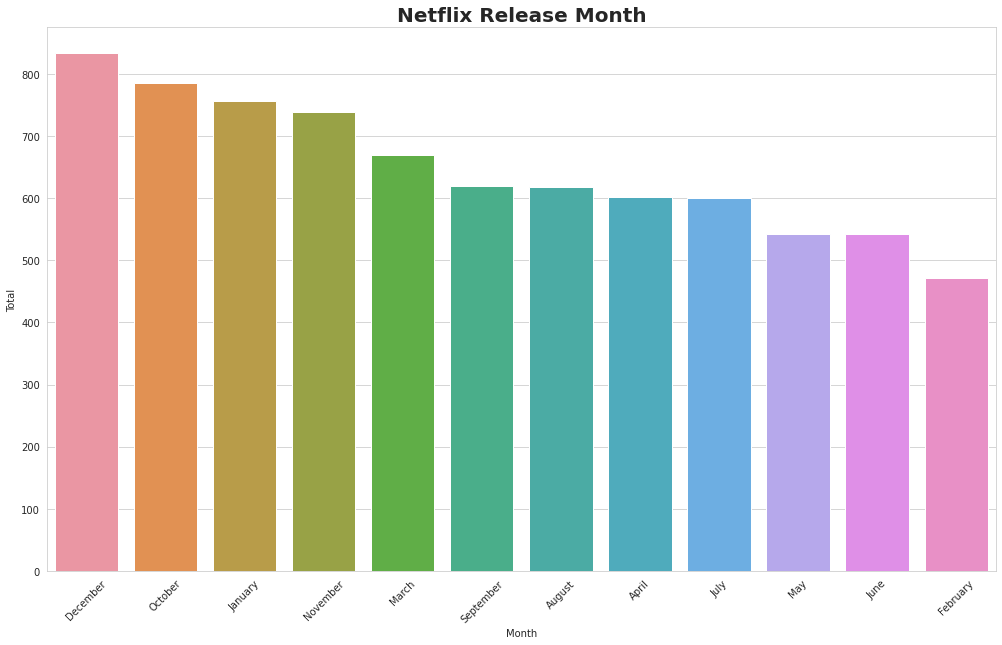

In [ ]:
plt.figure(figsize=(17,10))
sns.countplot(x='month_release', data=netflix,order=netflix['month_release'].value_counts().index[0:12])
plt.xticks(rotation=45)
plt.title("Netflix Release Month", fontsize =20, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total")